# basis Encoding

In [ ]:
!pip install qiskit==1.1.0
!pip install qiskit-algorithms
!pip install qiskit-machine-learning
import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# Set seed for random generators
algorithm_globals.random_seed = 42
!pip install tensorflow tensorflow_quantum cirq sympy
import torch
from torch import cat, no_grad, manual_seed
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import (
    Module,
    Conv2d,
    Linear,
    Dropout2d,
    NLLLoss,
    MaxPool2d,
    Flatten,
    Sequential,
    ReLU,
)
import torch.nn.functional as F

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512616 sha256=0c370f7c113436cc2d06e3e099c8207bbf5dd853732aa837af63ccf19fc0f496
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c

In [ ]:
manual_seed(42)

batch_size = 1
n_samples = 100
X_train = datasets.MNIST(
    root="./data", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()])
)

# Filter out labels leaving only labels 0 and 1
idx = np.append(
    np.where(X_train.targets == 0)[0][:n_samples], np.where(X_train.targets == 1)[0][:n_samples]
)
X_train.data = X_train.data[idx]
X_train.targets = X_train.targets[idx]

# Define torch dataloader with filtered data
train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5464047.22it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 159963.04it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1513146.68it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8366503.63it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Test Dataset
# -------------
n_samples = 50

X_test = datasets.MNIST(
    root="./data", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()])
)
idx = np.append(
    np.where(X_test.targets == 0)[0][:n_samples], np.where(X_test.targets == 1)[0][:n_samples]
)
X_test.data = X_test.data[idx]
X_test.targets = X_test.targets[idx]

test_loader = DataLoader(X_test, batch_size=batch_size, shuffle=True)

In [ ]:
def basis_encoding(data):
    num_qubits = len(data[0])
    feature_map = QuantumCircuit(num_qubits)

    for i, value in enumerate(data[0]):
        if value == 1:
            feature_map.x(i)

    return feature_map

def create_qnn():
    num_qubits = 2

    feature_map = basis_encoding([[1, 0]])

    ansatz = RealAmplitudes(num_qubits, reps=1)
    qc = QuantumCircuit(num_qubits)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True,
    )
    return qnn

qnn4 = create_qnn()


In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit_machine_learning.neural_networks import EstimatorQNN
import torch
import torch.nn.functional as F
from torch.nn import Module, Conv2d, Dropout2d, Linear
from qiskit_machine_learning.connectors import TorchConnector

def basis_encoding(bit_string):
    n = len(bit_string)
    qc = QuantumCircuit(n)
    for i, bit in enumerate(bit_string):
        if bit == 1:
            qc.x(i)
    return qc

def create_qnn():
    num_qubits = 2
    qc = QuantumCircuit(num_qubits)

    # Add some variational layers
    params = [Parameter(f'θ{i}') for i in range(num_qubits)]
    for i in range(num_qubits):
        qc.ry(params[i], i)
    qc.cx(0, 1)

    # Define observable for measurement
    observable = SparsePauliOp.from_list([("Z" * num_qubits, 1)])

    # Create the QNN
    qnn = EstimatorQNN(
        circuit=qc,
        observables=observable,
        input_params=params,
        weight_params=[],
    )
    return qnn

qnn4 = create_qnn()

class Net(Module):
    def __init__(self, qnn):
        super().__init__()
        self.conv1 = Conv2d(1, 2, kernel_size=5)
        self.conv2 = Conv2d(2, 16, kernel_size=5)
        self.dropout = Dropout2d()
        self.fc1 = Linear(256, 64)
        self.fc2 = Linear(64, 2)  # 2-dimensional output for basis encoding
        self.qnn = TorchConnector(qnn)
        self.fc3 = Linear(1, 2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        # Convert to binary for basis encoding
        x = (x > 0).float()
        # The QNN now directly takes the binary tensor
        x = self.qnn(x)  # Apply QNN
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

model4 = Net(qnn4)

In [ ]:
optimizer = optim.Adam(model4.parameters(), lr=0.001)
loss_func = NLLLoss()
accuracy_list = []

# Start training
epochs = 10  # Set number of epochs
loss_list = []  # Store loss history
model4.train()  # Set model to training mode

for epoch in range(epochs):
    correct_predictions = 0
    total_predictions = 0
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad(set_to_none=True)  # Initialize gradient
        output = model4(data)  # Forward pass
        loss = loss_func(output, target)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize weights
        _, predicted = torch.max(output, 1)
        correct_predictions += (predicted == target).sum().item()
        total_predictions += target.size(0)
        total_loss.append(loss.item())  # Store loss
    loss_list.append(sum(total_loss) / len(total_loss))
    accuracy = correct_predictions / total_predictions
    accuracy_list.append(accuracy)
    print("Training [{:.0f}%]\tLoss: {:.4f}".format(100.0 * (epoch + 1) / epochs, loss_list[-1]))


Training [10%]	Loss: 0.7388
Training [20%]	Loss: 0.7191
Training [30%]	Loss: 0.7078
Training [40%]	Loss: 0.7013
Training [50%]	Loss: 0.6980
Training [60%]	Loss: 0.6960
Training [70%]	Loss: 0.6952
Training [80%]	Loss: 0.6943
Training [90%]	Loss: 0.6942
Training [100%]	Loss: 0.6940


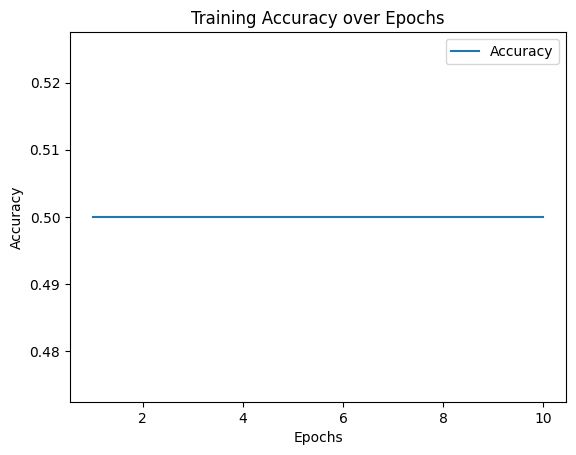

In [ ]:
plt.plot(range(1, epochs + 1), accuracy_list, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.show()